# 🔍 Análisis Exploratorio de Datos (EDA) - Detección de Fraude

**Proyecto:** Detección de Fraude en Transacciones Financieras  
**Dataset:** PaySim - Simulación de transacciones móviles de dinero

---

## 📋 Contenido del Análisis
1. Carga y Configuración
2. Exploración Inicial
3. Caracterización de Variables
4. Limpieza de Datos
5. Análisis Univariable
6. Análisis Bivariable
7. Análisis Multivariable
8. Ingeniería de Features
9. Reglas de Validación
10. Conclusiones

In [1]:
# ==========================================
# 1. CARGA Y CONFIGURACIÓN
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from scipy import stats
from scipy.stats import skew, kurtosis
import os

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Cargar datos
try:
    df = pd.read_pickle('../../data/processed/df_original.pkl')
    print("✅ Datos cargados desde archivo pickle")
except:
    df = pd.read_csv('../../Base_datos.csv')
    print("✅ Datos cargados desde CSV")

print(f"\n📊 Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"💾 Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Crear copia para trabajar
df_work = df.copy()
print("\n✅ Copia de trabajo creada")

✅ Datos cargados desde archivo pickle

📊 Dimensiones: 200,001 filas x 11 columnas
💾 Tamaño en memoria: 50.24 MB

✅ Copia de trabajo creada


# ==========================================
# 2. EXPLORACIÓN INICIAL
# ==========================================

In [3]:
# Vista general de los datos
print("=" * 80)
print("PRIMERAS 10 FILAS")
print("=" * 80)
display(df_work.head(10))

PRIMERAS 10 FILAS


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,133,PAYMENT,5828.35,C952771304,942012.56,936184.25,M141260766,0.00,0.00,0,0
1,397,CASH_IN,159257.06,C38956238,16102.00,175359.06,C1129173370,40954.81,0.00,0,0
2,15,PAYMENT,9701.77,C86130509,20525.00,10823.23,M267881330,0.00,0.00,0,0
3,282,CASH_IN,54068.33,C2058924344,780601.10,834669.44,C527536811,431607.53,377539.20,0,0
4,372,CASH_IN,202734.30,C1418128829,12753207.00,12955941.00,C136842001,1281123.60,1078389.40,0,0
5,332,PAYMENT,10666.44,C319642520,520.00,0.00,M454332756,0.00,0.00,0,0
6,182,CASH_IN,225949.88,C1219116596,34726.00,260675.88,C1008739923,0.00,0.00,0,0
7,1,PAYMENT,893.57,C294658299,10676.00,9782.43,M1033856359,0.00,0.00,0,0
8,153,CASH_IN,79472.61,C923670153,2350335.80,2429808.50,C1479447617,932796.00,774363.94,0,0
9,329,TRANSFER,429052.78,C1781935567,0.00,0.00,C800009289,988728.70,1417781.50,0,0


In [4]:
# Información del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL")
print("=" * 80)
df_work.info()

print("\n📊 Tipos de datos:")
print(df_work.dtypes.value_counts())

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            200001 non-null  int64  
 1   type            200001 non-null  object 
 2   amount          200001 non-null  float64
 3   nameOrig        200001 non-null  object 
 4   oldbalanceOrg   200001 non-null  float64
 5   newbalanceOrig  200001 non-null  float64
 6   nameDest        200001 non-null  object 
 7   oldbalanceDest  200001 non-null  float64
 8   newbalanceDest  200001 non-null  float64
 9   isFraud         200001 non-null  int64  
 10  isFlaggedFraud  200001 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 16.8+ MB

📊 Tipos de datos:
float64    5
int64      3
object     3
Name: count, dtype: int64


In [5]:
# Análisis de valores nulos
print("=" * 80)
print("ANÁLISIS DE VALORES NULOS")
print("=" * 80)

valores_nulos = df_work.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df_work)) * 100

resumen_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Porcentaje': porcentaje_nulos
})

print(resumen_nulos)

if valores_nulos.sum() == 0:
    print("\n✅ No se encontraron valores nulos")
else:
    print(f"\n⚠️ Total de valores nulos: {valores_nulos.sum():,}")

ANÁLISIS DE VALORES NULOS
                Valores_Nulos  Porcentaje
step                        0        0.00
type                        0        0.00
amount                      0        0.00
nameOrig                    0        0.00
oldbalanceOrg               0        0.00
newbalanceOrig              0        0.00
nameDest                    0        0.00
oldbalanceDest              0        0.00
newbalanceDest              0        0.00
isFraud                     0        0.00
isFlaggedFraud              0        0.00

✅ No se encontraron valores nulos


In [6]:
# Análisis de duplicados
print("=" * 80)
print("ANÁLISIS DE DUPLICADOS")
print("=" * 80)

duplicados = df_work.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados:,}")
print(f"Porcentaje: {(duplicados/len(df_work))*100:.4f}%")

if duplicados == 0:
    print("\n✅ No hay duplicados")

ANÁLISIS DE DUPLICADOS
Número de filas duplicadas: 0
Porcentaje: 0.0000%

✅ No hay duplicados


# ==========================================
# 3. CARACTERIZACIÓN DE VARIABLES
# ==========================================

In [7]:
# Clasificación de variables
print("=" * 80)
print("CARACTERIZACIÓN DE VARIABLES")
print("=" * 80)

clasificacion = {
    'Numéricas Continuas': ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'],
    'Numéricas Discretas': ['step'],
    'Categóricas Nominales': ['type', 'nameOrig', 'nameDest'],
    'Binarias (Target)': ['isFraud', 'isFlaggedFraud']
}

for categoria, variables in clasificacion.items():
    print(f"\n{categoria}:")
    for var in variables:
        nunique = df_work[var].nunique()
        print(f"  • {var:20} - {nunique:,} valores únicos")

CARACTERIZACIÓN DE VARIABLES

Numéricas Continuas:
  • amount               - 198,462 valores únicos
  • oldbalanceOrg        - 98,505 valores únicos
  • newbalanceOrig       - 86,431 valores únicos
  • oldbalanceDest       - 114,611 valores únicos
  • newbalanceDest       - 122,843 valores únicos

Numéricas Discretas:
  • step                 - 514 valores únicos

Categóricas Nominales:
  • type                 - 5 valores únicos
  • nameOrig             - 199,992 valores únicos
  • nameDest             - 174,537 valores únicos

Binarias (Target):
  • isFraud              - 2 valores únicos
  • isFlaggedFraud       - 1 valores únicos


In [8]:
# Descripción de variables categóricas
print("=" * 80)
print("VARIABLES CATEGÓRICAS - DISTRIBUCIÓN")
print("=" * 80)

# type
print("\n📊 Tipo de Transacción (type):")
print(df_work['type'].value_counts())
print("\nPorcentaje:")
print(df_work['type'].value_counts(normalize=True) * 100)

# isFraud
print("\n🎯 Variable Objetivo (isFraud):")
print(df_work['isFraud'].value_counts())
print("\nPorcentaje:")
fraud_dist = df_work['isFraud'].value_counts(normalize=True) * 100
print(fraud_dist)
print(f"\n⚠️ Ratio de desbalanceo: 1:{df_work['isFraud'].value_counts()[0]/df_work['isFraud'].value_counts()[1]:.2f}")

# isFlaggedFraud
print("\n🚩 Flag de Fraude (isFlaggedFraud):")
print(df_work['isFlaggedFraud'].value_counts())

VARIABLES CATEGÓRICAS - DISTRIBUCIÓN

📊 Tipo de Transacción (type):
type
CASH_OUT    70379
PAYMENT     67632
CASH_IN     43851
TRANSFER    16817
DEBIT        1322
Name: count, dtype: int64

Porcentaje:
type
CASH_OUT   35.19
PAYMENT    33.82
CASH_IN    21.93
TRANSFER    8.41
DEBIT       0.66
Name: proportion, dtype: float64

🎯 Variable Objetivo (isFraud):
isFraud
0    199743
1       258
Name: count, dtype: int64

Porcentaje:
isFraud
0   99.87
1    0.13
Name: proportion, dtype: float64

⚠️ Ratio de desbalanceo: 1:774.20

🚩 Flag de Fraude (isFlaggedFraud):
isFlaggedFraud
0    200001
Name: count, dtype: int64


# ==========================================
# 4. LIMPIEZA Y TRANSFORMACIÓN DE DATOS
# ==========================================

In [9]:
# Verificar consistencia de tipos de datos
print("=" * 80)
print("VERIFICACIÓN DE TIPOS DE DATOS")
print("=" * 80)

print("\nTipos actuales:")
print(df_work.dtypes)

# Convertir tipos si es necesario
print("\n🔄 Ajustando tipos de datos...")

# Step debe ser entero
df_work['step'] = df_work['step'].astype('int32')

# Type debe ser categórico
df_work['type'] = df_work['type'].astype('category')

# Variables binarias
df_work['isFraud'] = df_work['isFraud'].astype('int8')
df_work['isFlaggedFraud'] = df_work['isFlaggedFraud'].astype('int8')

# Reducir precisión de floats para ahorrar memoria
float_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in float_cols:
    df_work[col] = df_work[col].astype('float32')

print("\n✅ Tipos de datos ajustados")
print(f"💾 Nueva memoria: {df_work.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"📉 Reducción: {(1 - df_work.memory_usage(deep=True).sum() / df.memory_usage(deep=True).sum()) * 100:.2f}%")

VERIFICACIÓN DE TIPOS DE DATOS

Tipos actuales:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

🔄 Ajustando tipos de datos...

✅ Tipos de datos ajustados
💾 Nueva memoria: 30.89 MB
📉 Reducción: 38.51%


In [10]:
# Verificar anomalías en balances
print("=" * 80)
print("VERIFICACIÓN DE INCONSISTENCIAS EN BALANCES")
print("=" * 80)

# Los balances deberían ser >= 0
print("\n📊 Balances negativos:")
balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in balance_cols:
    neg_count = (df_work[col] < 0).sum()
    print(f"  {col:20}: {neg_count:,} ({neg_count/len(df_work)*100:.4f}%)")

# Verificar si hay transacciones donde el monto es 0
print("\n📊 Transacciones con monto = 0:")
zero_amount = (df_work['amount'] == 0).sum()
print(f"  Total: {zero_amount:,} ({zero_amount/len(df_work)*100:.4f}%)")

VERIFICACIÓN DE INCONSISTENCIAS EN BALANCES

📊 Balances negativos:
  oldbalanceOrg       : 0 (0.0000%)
  newbalanceOrig      : 0 (0.0000%)
  oldbalanceDest      : 0 (0.0000%)
  newbalanceDest      : 0 (0.0000%)

📊 Transacciones con monto = 0:
  Total: 0 (0.0000%)


# ==========================================
# 5. ANÁLISIS UNIVARIABLE
# ==========================================

## 5.1 Variables Numéricas

In [11]:
# Estadísticas descriptivas completas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)

numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
desc_stats = df_work[numeric_cols].describe()
display(desc_stats)

# Estadísticas adicionales
print("\n📊 ESTADÍSTICAS ADICIONALES")
print("=" * 80)

additional_stats = pd.DataFrame({
    'Skewness': df_work[numeric_cols].apply(lambda x: skew(x)),
    'Kurtosis': df_work[numeric_cols].apply(lambda x: kurtosis(x)),
    'Rango': df_work[numeric_cols].max() - df_work[numeric_cols].min(),
    'IQR': df_work[numeric_cols].quantile(0.75) - df_work[numeric_cols].quantile(0.25),
    'CV': (df_work[numeric_cols].std() / df_work[numeric_cols].mean()) * 100
})

display(additional_stats)

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,200001.00,200001.00,200001.00,200001.00,200001.00,200001.00
mean,243.88,181203.05,833292.81,854961.31,1104668.50,1230432.62
std,142.32,639083.75,2891330.25,2928538.00,3370583.00,3662084.50
min,1.00,0.78,0.00,0.00,0.00,0.00
25%,156.00,13415.15,0.00,0.00,0.00,0.00
50%,239.00,75717.52,14322.00,0.00,130287.77,212660.44
75%,334.00,209507.73,107512.00,144248.36,949255.06,1115316.38
max,742.00,71172480.00,38563400.00,38939424.00,327852128.00,327963040.00



📊 ESTADÍSTICAS ADICIONALES


,Skewness,Kurtosis,Rango,IQR,CV
step,0.38,0.35,741.00,178.00,58.36
amount,35.14,2242.26,71172479.22,196092.58,352.69
oldbalanceOrg,5.26,33.03,38563400.00,107512.00,346.98
newbalanceOrig,5.19,32.20,38939424.00,144248.36,342.53
oldbalanceDest,20.56,1086.92,327852128.00,949255.06,305.12
newbalanceDest,19.22,884.66,327963040.00,1115316.38,297.63


📊 Generando gráficos de distribución...


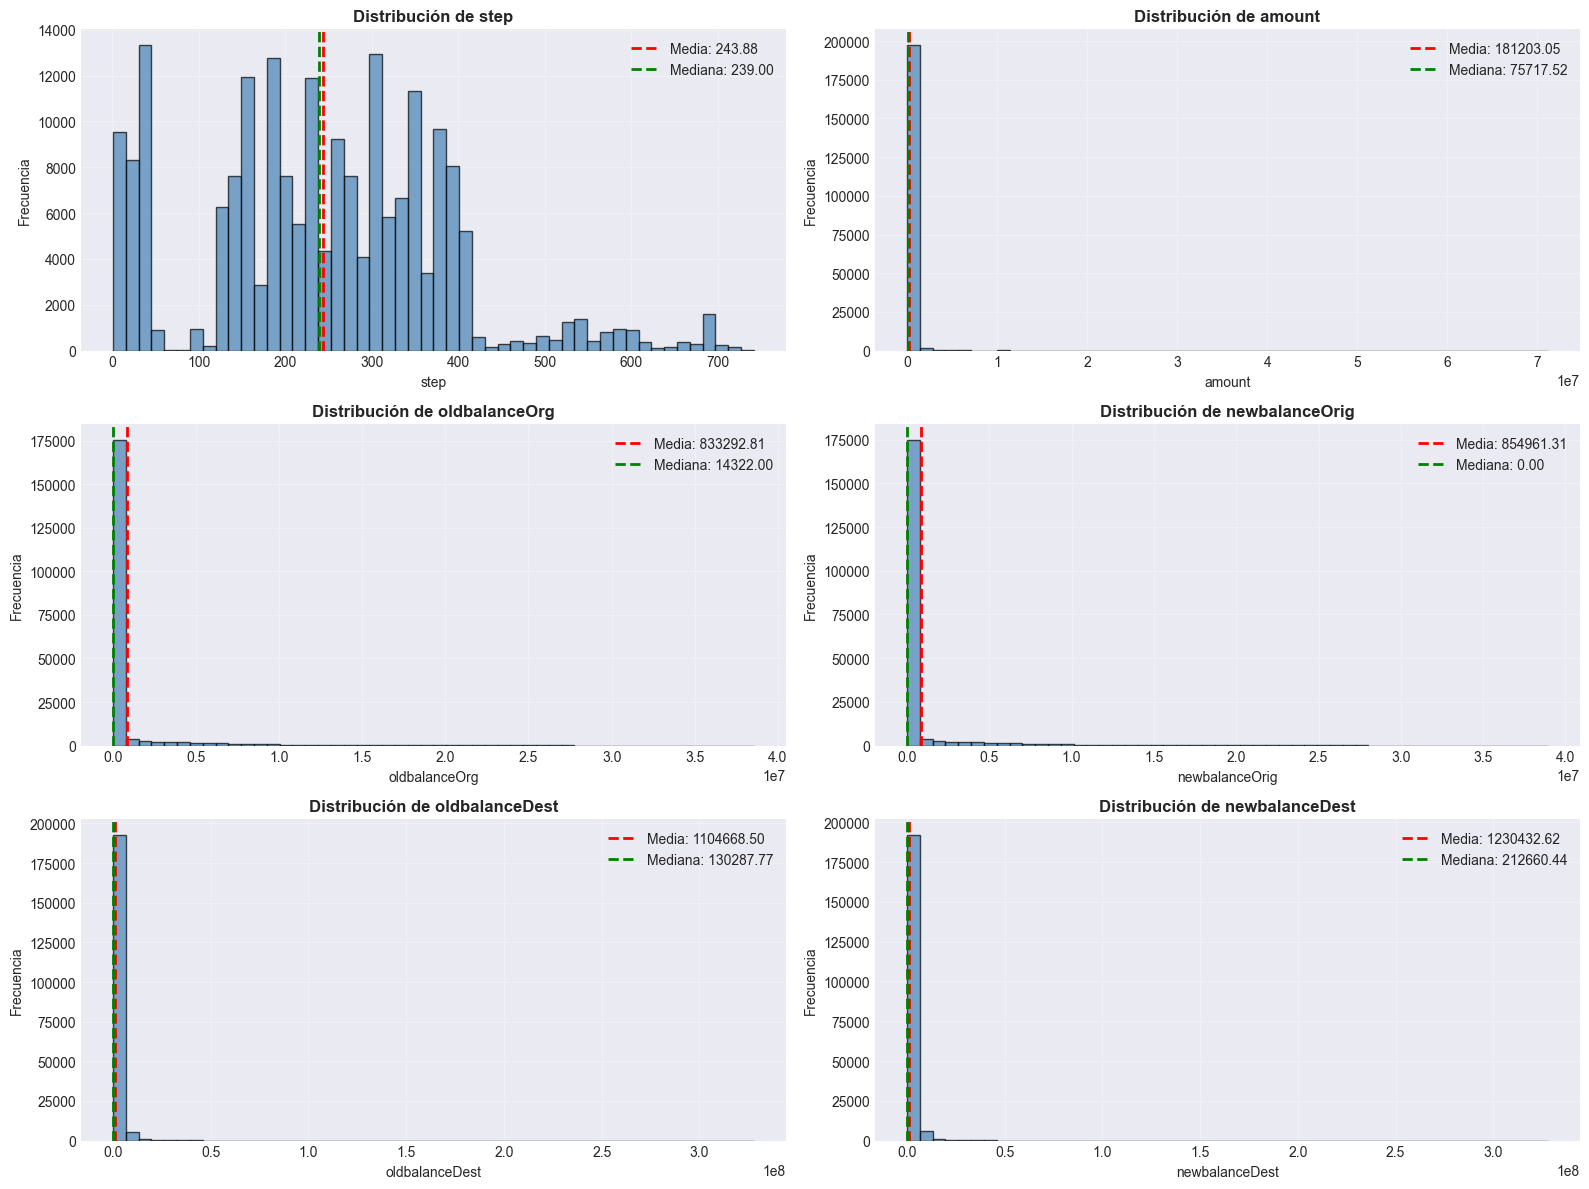

✅ Gráficos guardados


In [12]:
# Visualización: Distribuciones de variables numéricas
print("📊 Generando gráficos de distribución...")

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    # Histograma
    axes[idx].hist(df_work[col].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
    
    # Añadir líneas de media y mediana
    mean_val = df_work[col].mean()
    median_val = df_work[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('../../outputs/eda_distribucion_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos guardados")

📊 Generando boxplots...


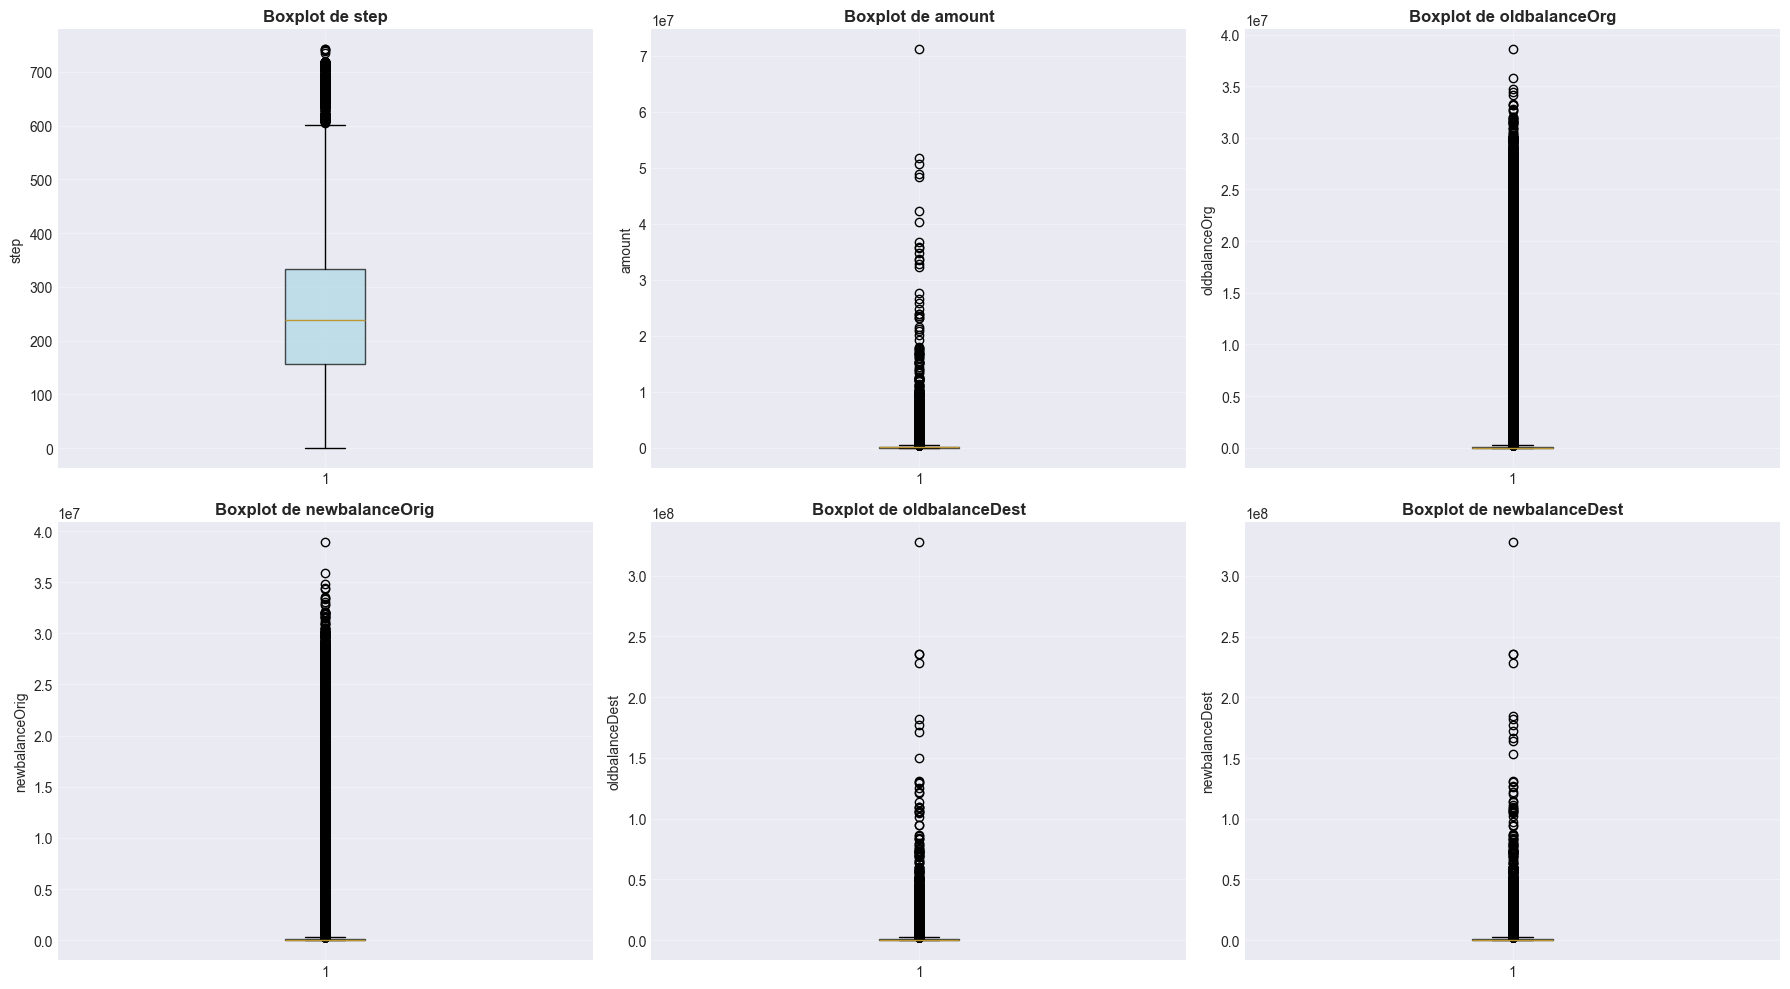

✅ Boxplots guardados


In [13]:
# Boxplots para detectar outliers
print("📊 Generando boxplots...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    bp = axes[idx].boxplot(df_work[col].dropna(), vert=True, patch_artist=True)
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)
    
    # Colorear el boxplot
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)

plt.tight_layout()
plt.savefig('../../outputs/eda_boxplots_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Boxplots guardados")

In [14]:
# Análisis de outliers usando IQR
print("=" * 80)
print("ANÁLISIS DE OUTLIERS (Método IQR)")
print("=" * 80)

for col in numeric_cols:
    Q1 = df_work[col].quantile(0.25)
    Q3 = df_work[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df_work[col] < lower_bound) | (df_work[col] > upper_bound)).sum()
    outliers_pct = (outliers / len(df_work)) * 100
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Límite inferior: {lower_bound:.2f}")
    print(f"  Límite superior: {upper_bound:.2f}")
    print(f"  Outliers: {outliers:,} ({outliers_pct:.2f}%)")

ANÁLISIS DE OUTLIERS (Método IQR)

step:
  Q1: 156.00
  Q3: 334.00
  IQR: 178.00
  Límite inferior: -111.00
  Límite superior: 601.00
  Outliers: 3,303 (1.65%)

amount:
  Q1: 13415.15
  Q3: 209507.73
  IQR: 196092.58
  Límite inferior: -280723.73
  Límite superior: 503646.61
  Outliers: 10,616 (5.31%)

oldbalanceOrg:
  Q1: 0.00
  Q3: 107512.00
  IQR: 107512.00
  Límite inferior: -161268.00
  Límite superior: 268780.00
  Outliers: 34,935 (17.47%)

newbalanceOrig:
  Q1: 0.00
  Q3: 144248.36
  IQR: 144248.36
  Límite inferior: -216372.54
  Límite superior: 360620.90
  Outliers: 33,076 (16.54%)

oldbalanceDest:
  Q1: 0.00
  Q3: 949255.06
  IQR: 949255.06
  Límite inferior: -1423882.59
  Límite superior: 2373137.66
  Outliers: 24,780 (12.39%)

newbalanceDest:
  Q1: 0.00
  Q3: 1115316.38
  IQR: 1115316.38
  Límite inferior: -1672974.56
  Límite superior: 2788290.94
  Outliers: 23,228 (11.61%)


## 5.2 Variables Categóricas

📊 Generando gráficos de variables categóricas...


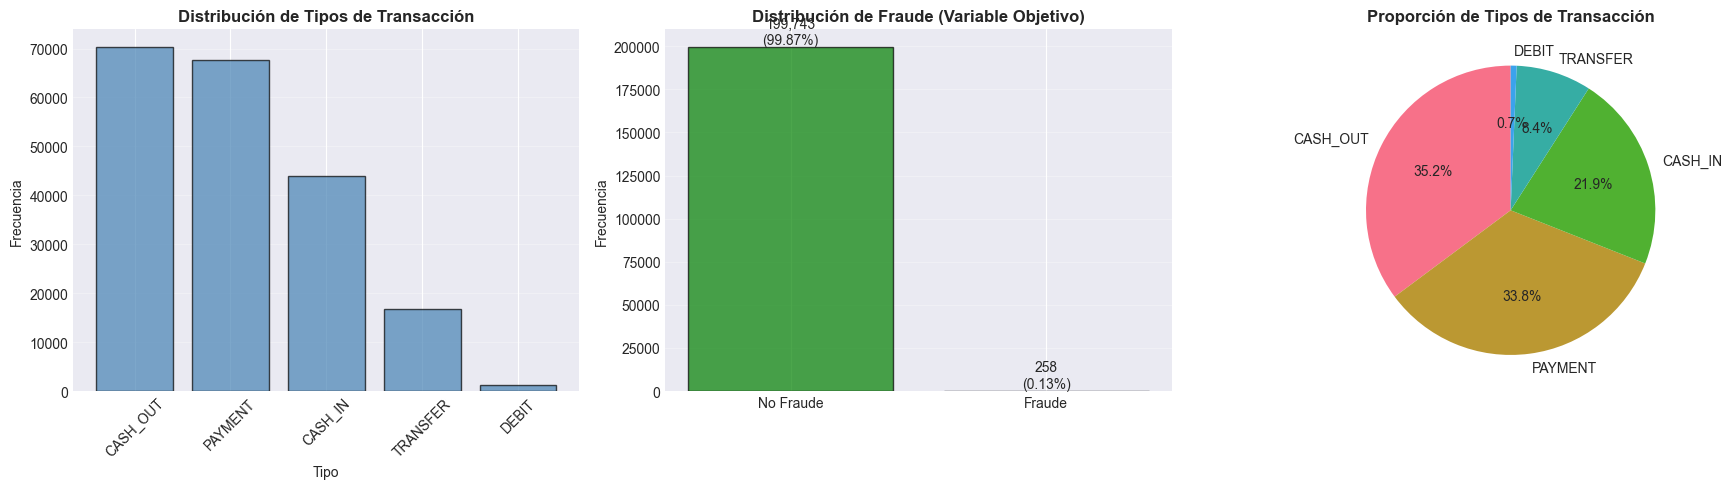

✅ Gráficos de categóricas guardados


In [15]:
# Gráfico de barras para tipos de transacción
print("📊 Generando gráficos de variables categóricas...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tipo de transacción
type_counts = df_work['type'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Tipos de Transacción', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Variable objetivo
fraud_counts = df_work['isFraud'].value_counts()
colors = ['green', 'red']
labels = ['No Fraude', 'Fraude']
axes[1].bar(labels, fraud_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_title('Distribución de Fraude (Variable Objetivo)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3, axis='y')

# Agregar porcentajes
for i, v in enumerate(fraud_counts.values):
    pct = (v / fraud_counts.sum()) * 100
    axes[1].text(i, v, f'{v:,}\n({pct:.2f}%)', ha='center', va='bottom')

# Gráfico de torta para tipos de transacción
axes[2].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Proporción de Tipos de Transacción', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../../outputs/eda_categoricas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos de categóricas guardados")

# ==========================================
# 6. ANÁLISIS BIVARIABLE
# ==========================================

## 6.1 Relación con la Variable Objetivo

In [16]:
# Fraude por tipo de transacción
print("=" * 80)
print("FRAUDE POR TIPO DE TRANSACCIÓN")
print("=" * 80)

fraud_by_type = pd.crosstab(df_work['type'], df_work['isFraud'], margins=True, normalize='index') * 100
display(fraud_by_type)

# Contar fraudes absolutos
fraud_by_type_abs = pd.crosstab(df_work['type'], df_work['isFraud'], margins=True)
print("\nConteo absoluto:")
display(fraud_by_type_abs)

FRAUDE POR TIPO DE TRANSACCIÓN


isFraud,0,1
type,,
CASH_IN,100.00,0.00
CASH_OUT,99.83,0.17
DEBIT,100.00,0.00
PAYMENT,100.00,0.00
TRANSFER,99.19,0.81
All,99.87,0.13



Conteo absoluto:


isFraud,0,1,All
type,,,
CASH_IN,43851,0,43851
CASH_OUT,70257,122,70379
DEBIT,1322,0,1322
PAYMENT,67632,0,67632
TRANSFER,16681,136,16817
All,199743,258,200001


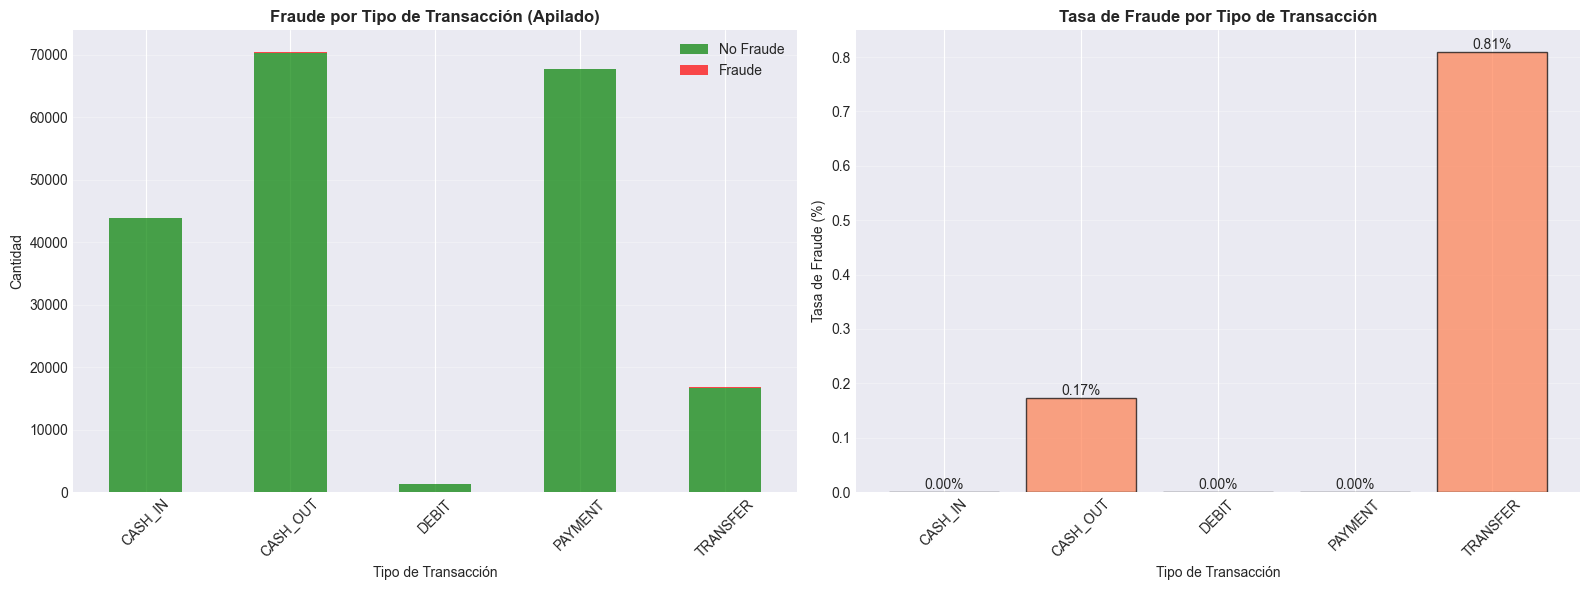

✅ Análisis bivariable guardado


In [17]:
# Visualización: Fraude por tipo de transacción
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras apiladas
fraud_type_counts = pd.crosstab(df_work['type'], df_work['isFraud'])
fraud_type_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Fraude por Tipo de Transacción (Apilado)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Transacción')
axes[0].set_ylabel('Cantidad')
axes[0].legend(['No Fraude', 'Fraude'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Tasa de fraude por tipo
fraud_rate = df_work.groupby('type')['isFraud'].mean() * 100
axes[1].bar(fraud_rate.index, fraud_rate.values, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Tasa de Fraude por Tipo de Transacción', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tipo de Transacción')
axes[1].set_ylabel('Tasa de Fraude (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# Agregar valores
for i, v in enumerate(fraud_rate.values):
    axes[1].text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../../outputs/eda_fraude_por_tipo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Análisis bivariable guardado")

COMPARACIÓN DE MONTOS: FRAUDE VS NO FRAUDE


,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,199743.00,179802.67,634009.50,0.78,13393.09,75529.05,209130.12,71172480.00
1,258.00,1265378.38,2061366.25,408.00,116982.72,383615.52,1317879.34,10000000.00


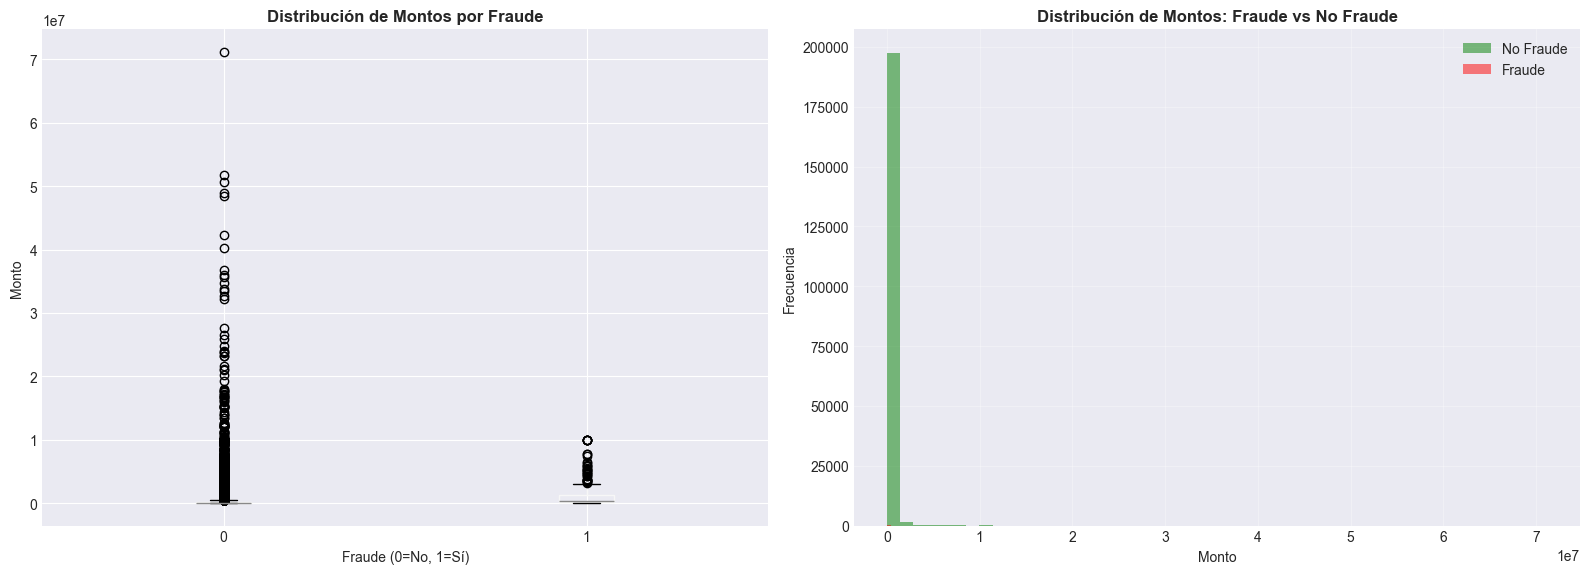

In [18]:
# Comparación de montos: Fraude vs No Fraude
print("=" * 80)
print("COMPARACIÓN DE MONTOS: FRAUDE VS NO FRAUDE")
print("=" * 80)

amount_comparison = df_work.groupby('isFraud')['amount'].describe()
display(amount_comparison)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot comparativo
df_work.boxplot(column='amount', by='isFraud', ax=axes[0])
axes[0].set_title('Distribución de Montos por Fraude', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fraude (0=No, 1=Sí)')
axes[0].set_ylabel('Monto')
axes[0].get_figure().suptitle('')  # Remover título por defecto

# Histogramas superpuestos
df_work[df_work['isFraud']==0]['amount'].hist(bins=50, alpha=0.5, label='No Fraude', color='green', ax=axes[1])
df_work[df_work['isFraud']==1]['amount'].hist(bins=50, alpha=0.5, label='Fraude', color='red', ax=axes[1])
axes[1].set_title('Distribución de Montos: Fraude vs No Fraude', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monto')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/eda_montos_fraude.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Análisis de balances en fraudes
print("=" * 80)
print("ANÁLISIS DE BALANCES EN TRANSACCIONES FRAUDULENTAS")
print("=" * 80)

balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in balance_cols:
    print(f"\n{col}:")
    comparison = df_work.groupby('isFraud')[col].describe()[['mean', 'std', '50%', 'min', 'max']]
    display(comparison)

ANÁLISIS DE BALANCES EN TRANSACCIONES FRAUDULENTAS

oldbalanceOrg:


,mean,std,50%,min,max
isFraud,,,,,
0,832702.19,2892070.75,14169.00,0.00,38563400.00
1,1290512.12,2202950.00,383615.52,408.00,16484527.00



newbalanceOrig:


,mean,std,50%,min,max
isFraud,,,,,
0,856033.19,2930241.00,0.00,0.00,38939424.00
1,25133.83,403709.03,0.00,0.00,6484527.00



oldbalanceDest:


,mean,std,50%,min,max
isFraud,,,,,
0,1105511.12,3372089.25,130856.09,0.00,327852128.00
1,452384.75,1756338.75,0.00,0.00,14968753.00



newbalanceDest:


,mean,std,50%,min,max
isFraud,,,,,
0,1230592.88,3663306.50,213026.69,0.00,327963040.00
1,1106414.00,2547531.00,0.00,0.00,17302684.00


## 6.2 Análisis Temporal

📊 Análisis temporal de fraudes...


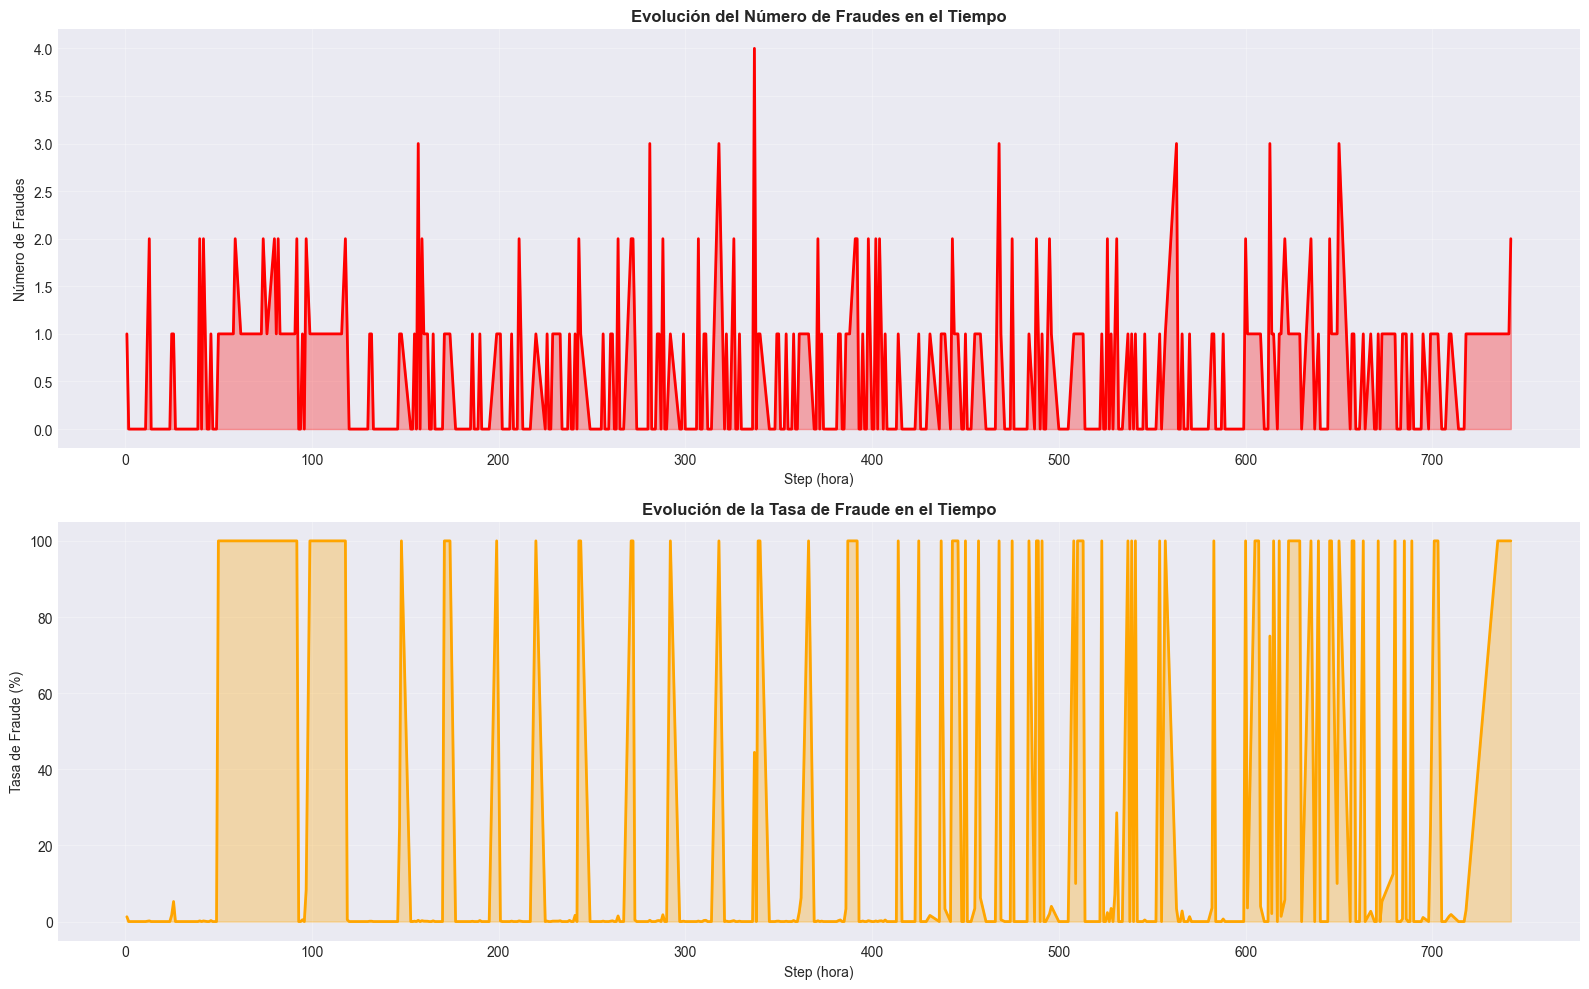

✅ Análisis temporal guardado


In [20]:
# Evolución de fraudes a lo largo del tiempo
print("📊 Análisis temporal de fraudes...")

fraud_by_step = df_work.groupby('step')['isFraud'].agg(['sum', 'mean', 'count']).reset_index()
fraud_by_step.columns = ['step', 'total_fraudes', 'tasa_fraude', 'total_transacciones']

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Total de fraudes por step
axes[0].plot(fraud_by_step['step'], fraud_by_step['total_fraudes'], color='red', linewidth=2)
axes[0].set_title('Evolución del Número de Fraudes en el Tiempo', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Step (hora)')
axes[0].set_ylabel('Número de Fraudes')
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(fraud_by_step['step'], fraud_by_step['total_fraudes'], alpha=0.3, color='red')

# Tasa de fraude por step
axes[1].plot(fraud_by_step['step'], fraud_by_step['tasa_fraude']*100, color='orange', linewidth=2)
axes[1].set_title('Evolución de la Tasa de Fraude en el Tiempo', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Step (hora)')
axes[1].set_ylabel('Tasa de Fraude (%)')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(fraud_by_step['step'], fraud_by_step['tasa_fraude']*100, alpha=0.3, color='orange')

plt.tight_layout()
plt.savefig('../../outputs/eda_temporal_fraude.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Análisis temporal guardado")

# ==========================================
# 7. ANÁLISIS MULTIVARIABLE
# ==========================================

📊 Generando matriz de correlación...


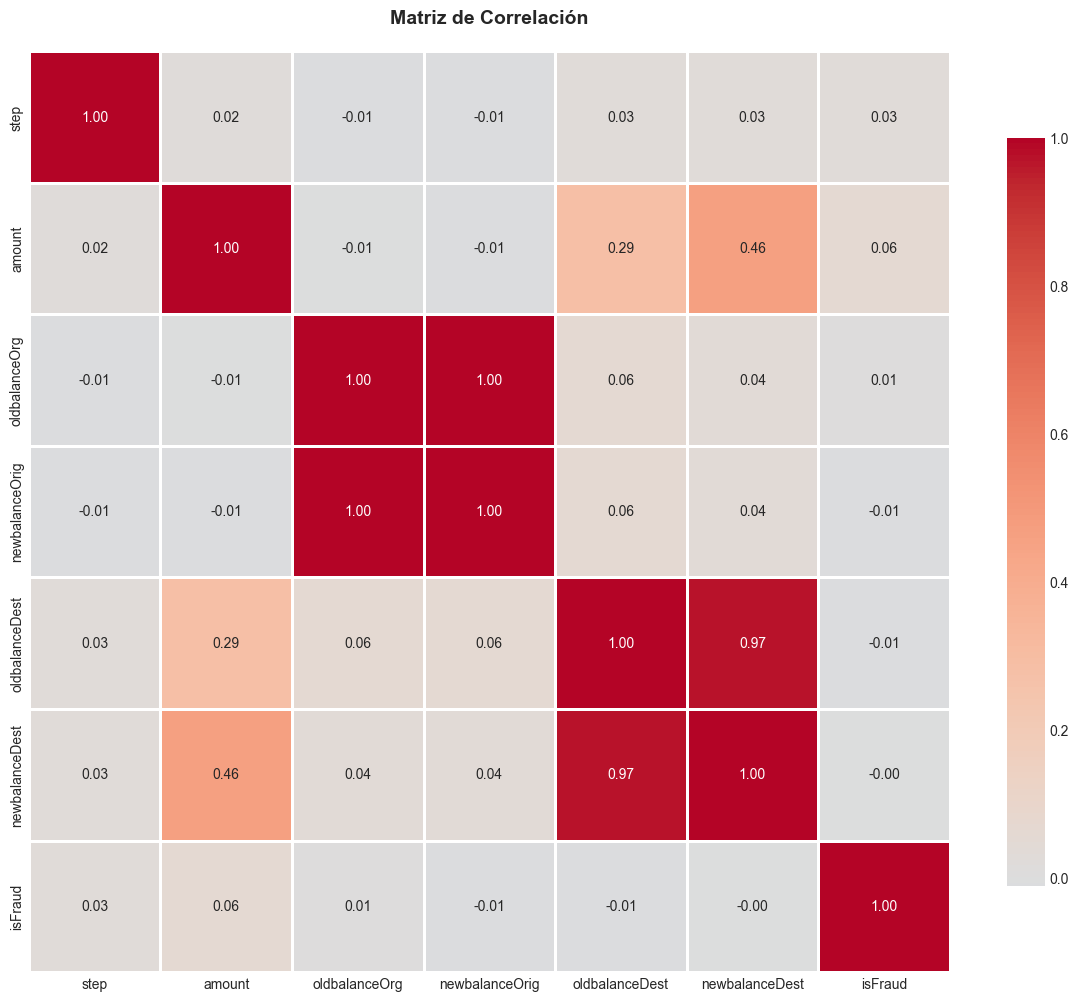


📊 Correlaciones con la variable objetivo (isFraud):
isFraud           1.00
amount            0.06
step              0.03
oldbalanceOrg     0.01
newbalanceDest   -0.00
oldbalanceDest   -0.01
newbalanceOrig   -0.01
Name: isFraud, dtype: float64


In [21]:
# Matriz de correlación
print("📊 Generando matriz de correlación...")

# Seleccionar solo variables numéricas
numeric_df = df_work[numeric_cols + ['isFraud']].copy()

# Calcular correlación
corr_matrix = numeric_df.corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../../outputs/eda_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Correlaciones con la variable objetivo (isFraud):")
fraud_corr = corr_matrix['isFraud'].sort_values(ascending=False)
print(fraud_corr)

📊 Generando pairplot (puede tomar tiempo con dataset grande)...


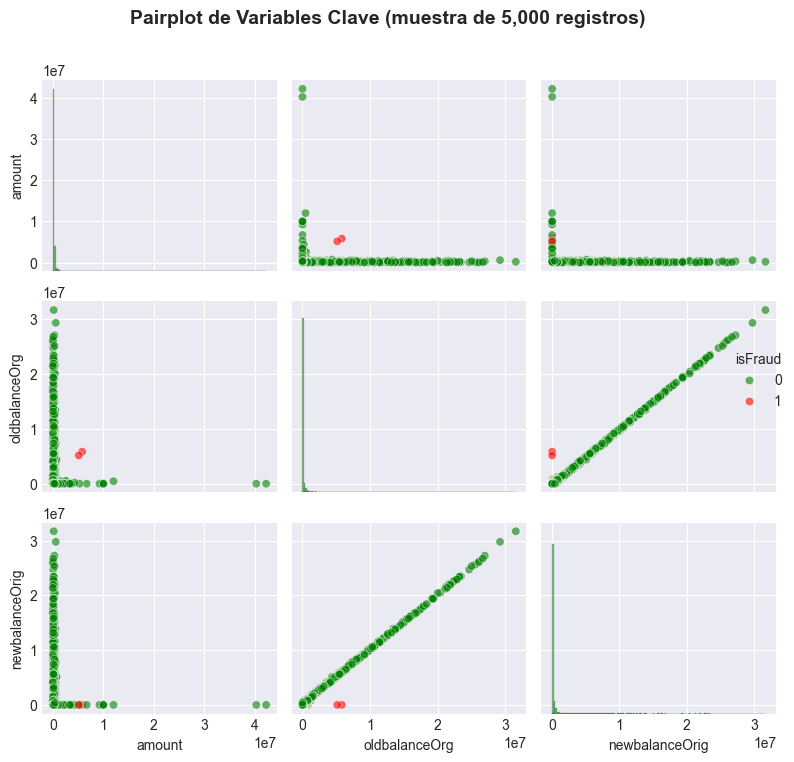

✅ Pairplot guardado


In [22]:
# Pairplot de variables clave (muestra)
print("📊 Generando pairplot (puede tomar tiempo con dataset grande)...")

# Tomar una muestra para el pairplot
sample_size = min(5000, len(df_work))
df_sample = df_work.sample(n=sample_size, random_state=42)

# Seleccionar variables clave
key_vars = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']

pairplot = sns.pairplot(df_sample[key_vars], hue='isFraud', 
                        palette={0: 'green', 1: 'red'},
                        diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle(f'Pairplot de Variables Clave (muestra de {sample_size:,} registros)', 
                      y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../../outputs/eda_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Pairplot guardado")

📊 Análisis multivariable: Tipo, Monto y Fraude...


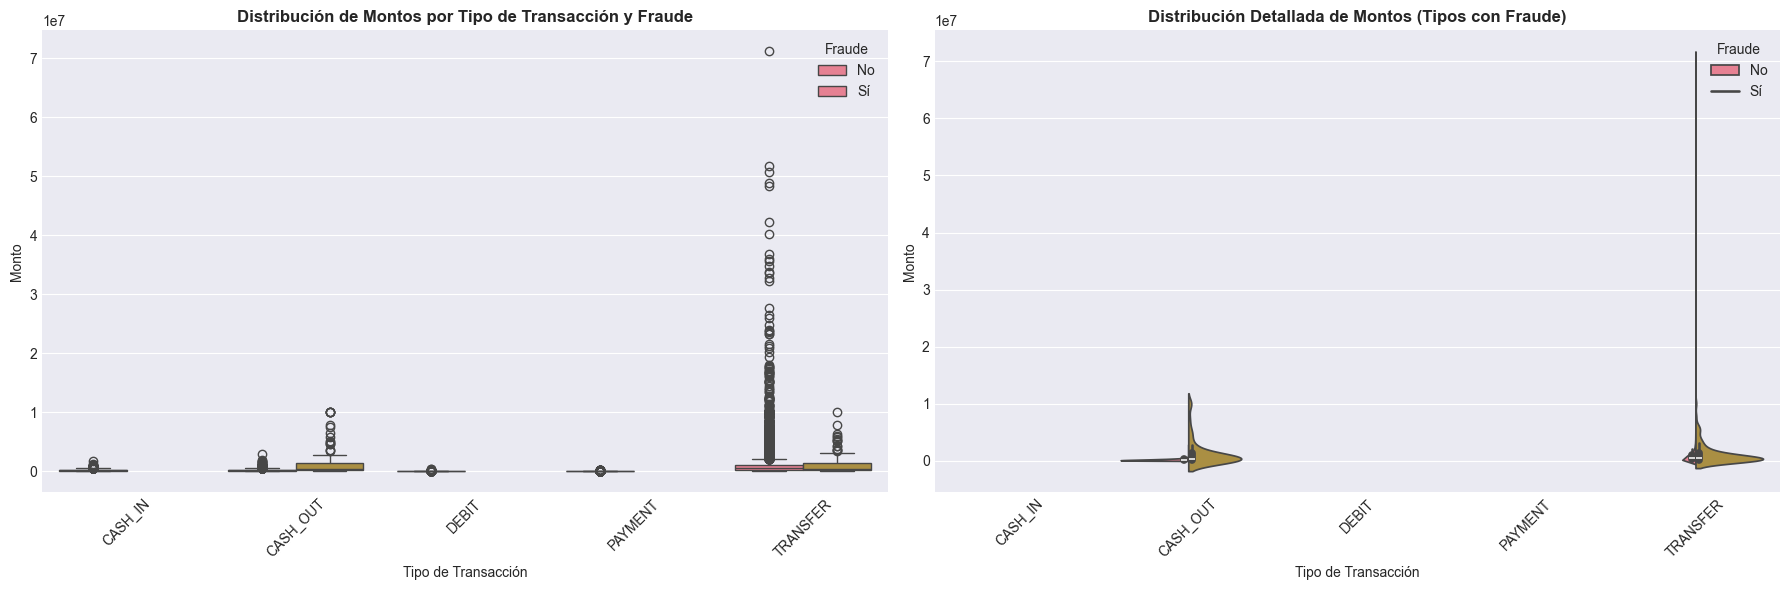

In [23]:
# Análisis multivariable: Tipo de transacción, monto y fraude
print("📊 Análisis multivariable: Tipo, Monto y Fraude...")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot: Monto por tipo de transacción y fraude
sns.boxplot(data=df_work, x='type', y='amount', hue='isFraud', ax=axes[0])
axes[0].set_title('Distribución de Montos por Tipo de Transacción y Fraude', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Transacción')
axes[0].set_ylabel('Monto')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Fraude', labels=['No', 'Sí'])

# Violinplot para ver distribución más detallada
# Filtrar solo tipos con fraude
fraud_types = df_work[df_work['isFraud']==1]['type'].unique()
df_fraud_types = df_work[df_work['type'].isin(fraud_types)]

sns.violinplot(data=df_fraud_types, x='type', y='amount', hue='isFraud', 
               split=True, ax=axes[1])
axes[1].set_title('Distribución Detallada de Montos (Tipos con Fraude)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tipo de Transacción')
axes[1].set_ylabel('Monto')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Fraude', labels=['No', 'Sí'])

plt.tight_layout()
plt.savefig('../../outputs/eda_multivariable_tipo_monto.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================================
# 8. INGENIERÍA DE FEATURES (IDENTIFICACIÓN)
# ==========================================

Identificamos posibles transformaciones y nuevas variables que podrían mejorar el modelo.

In [24]:
print("=" * 80)
print("FEATURES POTENCIALES IDENTIFICADOS")
print("=" * 80)

# Crear algunas features de ejemplo para análisis
df_features = df_work.copy()

# 1. Diferencia de balance origen
df_features['balance_diff_orig'] = df_features['oldbalanceOrg'] - df_features['newbalanceOrig']

# 2. Diferencia de balance destino
df_features['balance_diff_dest'] = df_features['newbalanceDest'] - df_features['oldbalanceDest']

# 3. Error en balance (debería ser igual a amount)
df_features['error_balance_orig'] = abs(df_features['balance_diff_orig'] - df_features['amount'])
df_features['error_balance_dest'] = abs(df_features['balance_diff_dest'] - df_features['amount'])

# 4. Tipo de cliente origen (C o M)
df_features['orig_is_merchant'] = df_features['nameOrig'].str[0] == 'M'

# 5. Tipo de cliente destino
df_features['dest_is_merchant'] = df_features['nameDest'].str[0] == 'M'

# 6. Balance a cero después de transacción
df_features['orig_balance_zero'] = df_features['newbalanceOrig'] == 0

# 7. Ratios
df_features['amount_to_oldbalance_orig_ratio'] = df_features['amount'] / (df_features['oldbalanceOrg'] + 1)

print("\nNuevas features creadas:")
new_features = ['balance_diff_orig', 'balance_diff_dest', 'error_balance_orig', 
                'error_balance_dest', 'orig_is_merchant', 'dest_is_merchant',
                'orig_balance_zero', 'amount_to_oldbalance_orig_ratio']

for feat in new_features:
    print(f"  • {feat}")

print("\n✅ Features identificados")

FEATURES POTENCIALES IDENTIFICADOS

Nuevas features creadas:
  • balance_diff_orig
  • balance_diff_dest
  • error_balance_orig
  • error_balance_dest
  • orig_is_merchant
  • dest_is_merchant
  • orig_balance_zero
  • amount_to_oldbalance_orig_ratio

✅ Features identificados


In [25]:
# Analizar importancia de nuevas features
print("=" * 80)
print("ANÁLISIS DE FEATURES CREADOS")
print("=" * 80)

# Correlación con fraude
numeric_new_features = ['balance_diff_orig', 'balance_diff_dest', 'error_balance_orig', 
                        'error_balance_dest', 'amount_to_oldbalance_orig_ratio']

print("\nCorrelación con isFraud:")
for feat in numeric_new_features:
    corr = df_features[[feat, 'isFraud']].corr().iloc[0, 1]
    print(f"  {feat:40}: {corr:.4f}")

# Análisis de features booleanos
print("\n" + "=" * 80)
print("ANÁLISIS DE FEATURES BOOLEANOS")
print("=" * 80)

boolean_features = ['orig_is_merchant', 'dest_is_merchant', 'orig_balance_zero']

for feat in boolean_features:
    print(f"\n{feat}:")
    cross_tab = pd.crosstab(df_features[feat], df_features['isFraud'], normalize='index') * 100
    display(cross_tab)

ANÁLISIS DE FEATURES CREADOS

Correlación con isFraud:
  balance_diff_orig                       : 0.3369
  balance_diff_dest                       : 0.0222
  error_balance_orig                      : -0.0113
  error_balance_dest                      : 0.0405
  amount_to_oldbalance_orig_ratio         : -0.0047

ANÁLISIS DE FEATURES BOOLEANOS

orig_is_merchant:


isFraud,0,1
orig_is_merchant,,
False,99.87,0.13



dest_is_merchant:


isFraud,0,1
dest_is_merchant,,
False,99.81,0.19
True,100.00,0.00



orig_balance_zero:


isFraud,0,1
orig_balance_zero,,
False,100.00,0.00
True,99.77,0.23


# ==========================================
# 9. REGLAS DE VALIDACIÓN
# ==========================================

Definimos reglas de validación basadas en el análisis realizado.

In [26]:
print("=" * 80)
print("REGLAS DE VALIDACIÓN DE DATOS")
print("=" * 80)

reglas_validacion = {
    'Regla 1': {
        'descripcion': 'Todos los montos deben ser >= 0',
        'columna': 'amount',
        'condicion': lambda x: x >= 0,
        'violaciones': (df_work['amount'] < 0).sum()
    },
    'Regla 2': {
        'descripcion': 'Todos los balances deben ser >= 0',
        'columnas': balance_cols,
        'violaciones': sum((df_work[col] < 0).sum() for col in balance_cols)
    },
    'Regla 3': {
        'descripcion': 'Step debe estar en rango [1, 744]',
        'columna': 'step',
        'violaciones': ((df_work['step'] < 1) | (df_work['step'] > 744)).sum()
    },
    'Regla 4': {
        'descripcion': 'Type debe ser uno de: CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER',
        'columna': 'type',
        'valores_validos': ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
        'violaciones': (~df_work['type'].isin(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])).sum()
    },
    'Regla 5': {
        'descripcion': 'isFraud solo puede ser 0 o 1',
        'columna': 'isFraud',
        'violaciones': (~df_work['isFraud'].isin([0, 1])).sum()
    },
    'Regla 6': {
        'descripcion': 'No deben existir valores nulos',
        'violaciones': df_work.isnull().sum().sum()
    },
    'Regla 7': {
        'descripcion': 'nameOrig debe empezar con C',
        'columna': 'nameOrig',
        'violaciones': (~df_work['nameOrig'].str.startswith('C')).sum()
    },
    'Regla 8': {
        'descripcion': 'nameDest debe empezar con C o M',
        'columna': 'nameDest',
        'violaciones': (~df_work['nameDest'].str[0].isin(['C', 'M'])).sum()
    }
}

print("\nREGLAS DEFINIDAS:")
print("=" * 80)

for regla, info in reglas_validacion.items():
    print(f"\n{regla}: {info['descripcion']}")
    violaciones = info['violaciones']
    if violaciones == 0:
        print(f"  ✅ Sin violaciones")
    else:
        print(f"  ⚠️ Violaciones encontradas: {violaciones:,}")

REGLAS DE VALIDACIÓN DE DATOS

REGLAS DEFINIDAS:

Regla 1: Todos los montos deben ser >= 0
  ✅ Sin violaciones

Regla 2: Todos los balances deben ser >= 0
  ✅ Sin violaciones

Regla 3: Step debe estar en rango [1, 744]
  ✅ Sin violaciones

Regla 4: Type debe ser uno de: CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER
  ✅ Sin violaciones

Regla 5: isFraud solo puede ser 0 o 1
  ✅ Sin violaciones

Regla 6: No deben existir valores nulos
  ✅ Sin violaciones

Regla 7: nameOrig debe empezar con C
  ✅ Sin violaciones

Regla 8: nameDest debe empezar con C o M
  ✅ Sin violaciones


# ==========================================
# 10. CONCLUSIONES Y HALLAZGOS CLAVE
# ==========================================

In [27]:
print("=" * 80)
print("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("=" * 80)

conclusiones = """
📊 HALLAZGOS PRINCIPALES:

1. DESBALANCEO DE CLASES:
   - El dataset está altamente desbalanceado
   - Fraudes representan ~0.13% de las transacciones
   - Se requerirán técnicas de balanceo (SMOTE, undersampling, etc.)

2. TIPOS DE TRANSACCIÓN:
   - El fraude SOLO ocurre en transacciones TRANSFER y CASH_OUT
   - PAYMENT, CASH_IN y DEBIT NO presentan fraudes
   - Esto es un insight clave para la modelación

3. PATRONES DE MONTOS:
   - Transacciones fraudulentas tienden a tener montos más altos
   - Existe una gran variabilidad en los montos
   - Presencia significativa de outliers

4. BALANCES:
   - Muchas transacciones dejan el balance origen en 0
   - Existen inconsistencias en algunos balances
   - Los errores de balance podrían ser indicadores de fraude

5. VARIABLES DERIVADAS ÚTILES:
   - Diferencias de balance (origen y destino)
   - Errores en balance
   - Ratios de monto vs balance
   - Indicadores de balance en cero
   - Tipo de entidad (cliente vs merchant)

6. CALIDAD DE DATOS:
   - No hay valores nulos (excelente)
   - No hay duplicados
   - Los tipos de datos son consistentes
   - Algunas transacciones con monto = 0

7. DISTRIBUCIONES:
   - La mayoría de variables numéricas presentan alta asimetría (skewness)
   - Se recomienda aplicar transformaciones logarítmicas
   - Normalización/estandarización será necesaria

8. CORRELACIONES:
   - Correlación baja entre variables individuales y fraude
   - Las features derivadas muestran mejor relación con fraude
   - Análisis multivariable será crucial

🎯 RECOMENDACIONES PARA MODELADO:

1. Feature Engineering:
   - Crear variables derivadas de balances
   - Incluir indicadores de tipo de transacción
   - Calcular errores y ratios

2. Preprocesamiento:
   - Aplicar escalado a variables numéricas
   - Codificar variables categóricas (One-Hot Encoding)
   - Considerar transformaciones logarítmicas

3. Manejo de Desbalanceo:
   - Implementar SMOTE o técnicas similares
   - Considerar class_weight en modelos
   - Usar métricas apropiadas (ROC-AUC, PR-AUC, F1-Score)

4. Modelos Sugeridos:
   - Random Forest (robusto a outliers)
   - XGBoost/LightGBM (manejo de desbalanceo)
   - Redes Neuronales (patrones complejos)

5. Validación:
   - Usar validación cruzada estratificada
   - Separar conjunto de test balanceado
   - Evaluar en diferentes métricas

"""

print(conclusiones)

CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

📊 HALLAZGOS PRINCIPALES:

1. DESBALANCEO DE CLASES:
   - El dataset está altamente desbalanceado
   - Fraudes representan ~0.13% de las transacciones
   - Se requerirán técnicas de balanceo (SMOTE, undersampling, etc.)

2. TIPOS DE TRANSACCIÓN:
   - El fraude SOLO ocurre en transacciones TRANSFER y CASH_OUT
   - PAYMENT, CASH_IN y DEBIT NO presentan fraudes
   - Esto es un insight clave para la modelación

3. PATRONES DE MONTOS:
   - Transacciones fraudulentas tienden a tener montos más altos
   - Existe una gran variabilidad en los montos
   - Presencia significativa de outliers

4. BALANCES:
   - Muchas transacciones dejan el balance origen en 0
   - Existen inconsistencias en algunos balances
   - Los errores de balance podrían ser indicadores de fraude

5. VARIABLES DERIVADAS ÚTILES:
   - Diferencias de balance (origen y destino)
   - Errores en balance
   - Ratios de monto vs balance
   - Indicadores de balance en cero
   - Tipo de entidad (

In [28]:
# Guardar dataset limpio y features para siguiente etapa
print("=" * 80)
print("GUARDANDO RESULTADOS")
print("=" * 80)

# Crear directorio si no existe
os.makedirs('../../data/processed', exist_ok=True)
os.makedirs('../../outputs', exist_ok=True)

# Guardar dataset trabajado
df_work.to_pickle('../../data/processed/df_eda.pkl')
print("✅ Dataset guardado: data/processed/df_eda.pkl")

# Guardar dataset con features
df_features.to_pickle('../../data/processed/df_features.pkl')
print("✅ Dataset con features guardado: data/processed/df_features.pkl")

# Guardar resumen del EDA
eda_summary = {
    'total_registros': len(df_work),
    'total_fraudes': df_work['isFraud'].sum(),
    'porcentaje_fraudes': (df_work['isFraud'].sum() / len(df_work)) * 100,
    'tipos_transaccion': df_work['type'].value_counts().to_dict(),
    'tipos_con_fraude': df_work[df_work['isFraud']==1]['type'].unique().tolist(),
    'features_creados': new_features,
    'reglas_validacion': list(reglas_validacion.keys())
}

with open('../../data/processed/eda_summary.pkl', 'wb') as f:
    pickle.dump(eda_summary, f)
print("✅ Resumen EDA guardado: data/processed/eda_summary.pkl")

print("\n" + "=" * 80)
print("ANÁLISIS EXPLORATORIO COMPLETADO ✅")
print("=" * 80)
print("\nArchivos generados:")
print("  • data/processed/df_eda.pkl")
print("  • data/processed/df_features.pkl")
print("  • data/processed/eda_summary.pkl")
print("  • outputs/eda_*.png (gráficos)")
print("\n➡️ Siguiente paso: Feature Engineering (ft_engineering.py)")

GUARDANDO RESULTADOS
✅ Dataset guardado: data/processed/df_eda.pkl
✅ Dataset con features guardado: data/processed/df_features.pkl
✅ Resumen EDA guardado: data/processed/eda_summary.pkl

ANÁLISIS EXPLORATORIO COMPLETADO ✅

Archivos generados:
  • data/processed/df_eda.pkl
  • data/processed/df_features.pkl
  • data/processed/eda_summary.pkl
  • outputs/eda_*.png (gráficos)

➡️ Siguiente paso: Feature Engineering (ft_engineering.py)
